In [114]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [115]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [116]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func ,inspect

In [117]:
# create engine to hawaii.sqlite
# engine = create_engine("sqlite:///hawaii.sqlite")
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [118]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [119]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [120]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [121]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [122]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [123]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [124]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [125]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
Last12Months = dt.date(2017,8, 23) - dt.timedelta(days = 365)
Last12Months

datetime.date(2016, 8, 23)

In [126]:
FinalResult = session.query(measurement.date, measurement.prcp).filter(measurement.date >= Last12Months)
FinalResult

In [127]:
# Save the query results as a Pandas DataFrame and set the index to the date column
DateScore = pd.DataFrame(FinalResult,columns=['date','prcp'])
DateScore.set_index('date', inplace=True)
DateScore=DateScore.sort_values(["date"])
DateScore.head(5)

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [128]:
#Use Pandas Plotting with Matplotlib to plot the data
DateScore = DateScore.groupby('date')
prcp_total = DateScore['prcp'].sum()
DateScore = pd.DataFrame({'Precipitation':prcp_total})
DateScore

,Precipitation
date,
2016-08-23,2.71
2016-08-24,9.33
2016-08-25,0.54
2016-08-26,0.10
2016-08-27,0.32
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.58


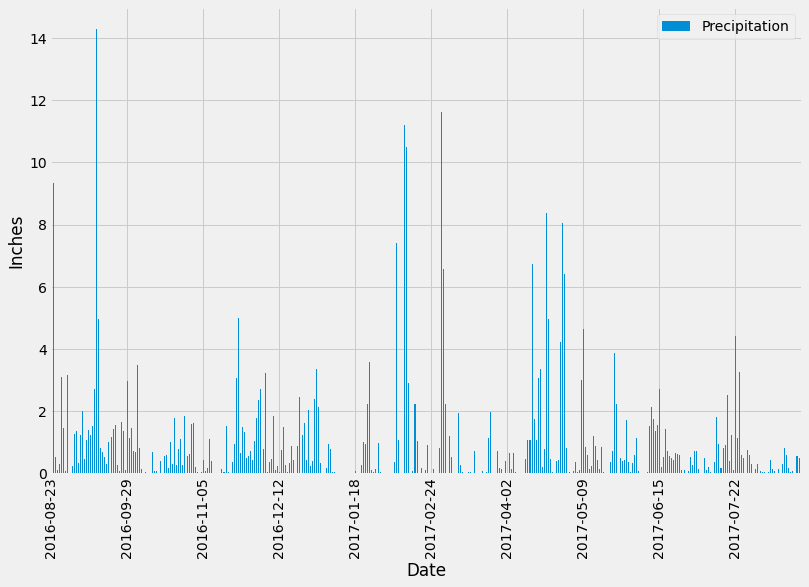

In [129]:
# Use Pandas Plotting with Matplotlib to plot the data
DateScore.plot.bar(figsize = (12,8))
plt.locator_params(axis='x', nbins=10)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()

In [130]:
DateScore.describe()

,Precipitation
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [131]:
# Design a query to calculate the total number stations in the dataset
engine.execute('SELECT COUNT(DISTINCT station) FROM measurement').fetchall()

[(9,)]

In [132]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
engine.execute('SELECT station, COUNT(station) AS "Station Count" FROM measurement GROUP BY station ORDER BY "Station Count" DESC;').fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [133]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
engine.execute('SELECT station, MIN(tobs), MAX(tobs), AVG(tobs) FROM measurement\
                WHERE station = "USC00519281"').fetchall()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

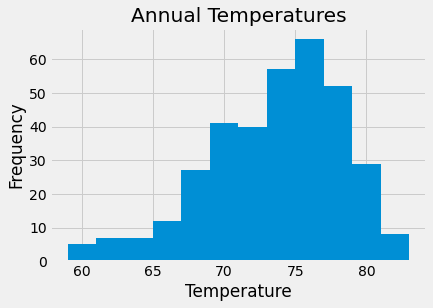

In [141]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = engine.execute('SELECT tobs FROM measurement WHERE station = "USC00519281"\
                        AND date > "2016-08-23"').fetchall()
df = pd.DataFrame(temps, columns = ['Annual Temperatures'])

df.hist(column = 'Annual Temperatures', bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()